In [1]:
import glob
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def make_plots(results, title):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9, 7))
    
    results_P1 = results.query("truth == 1")
    prob_P1_correct = np.count_nonzero(np.argmax(results_P1[["P1", "P2", "P3", "P4"]], axis=1) == 0) / len(results_P1)
    prob_P1_uncertainty = np.sqrt(prob_P1_correct * (1 - prob_P1_correct) / len(results_P1))
    ax1.hist(results_P1["P1"], bins=50, range=(0, 1), histtype="step", fill=True, color="lightblue", edgecolor="blue")
    ax1.set_xlabel("P(NOVA group 1 | truth = 1)")
    # ax1.set_yscale("log")
    ax1.legend([f"{int(prob_P1_correct*100):d}% ± {prob_P1_uncertainty*100:3.1f}% correct"])
    
    results_P2 = results.query("truth == 2")
    prob_P2_correct = np.count_nonzero(np.argmax(results_P2[["P1", "P2", "P3", "P4"]], axis=1) == 1) / len(results_P2)
    prob_P2_uncertainty = np.sqrt(prob_P2_correct * (1 - prob_P2_correct) / len(results_P2))
    ax2.hist(results_P2["P2"], bins=50, range=(0, 1), histtype="step", fill=True, color="lightblue", edgecolor="blue")
    ax2.set_xlabel("P(NOVA group 2 | truth = 2)")
    # ax2.set_yscale("log")
    ax2.legend([f"{int(prob_P2_correct*100):d}% ± {prob_P2_uncertainty*100:3.1f}% correct"])
    
    results_P3 = results.query("truth == 3")
    prob_P3_correct = np.count_nonzero(np.argmax(results_P3[["P1", "P2", "P3", "P4"]], axis=1) == 2) / len(results_P3)
    prob_P3_uncertainty = np.sqrt(prob_P3_correct * (1 - prob_P3_correct) / len(results_P3))
    ax3.hist(results_P3["P3"], bins=50, range=(0, 1), histtype="step", fill=True, color="lightblue", edgecolor="blue")
    ax3.set_xlabel("P(NOVA group 3 | truth = 3)")
    # ax3.set_yscale("log")
    ax3.legend([f"{int(prob_P3_correct*100):d}% ± {prob_P3_uncertainty*100:3.1f}% correct"])
    
    results_P4 = results.query("truth == 4")
    prob_P4_correct = np.count_nonzero(np.argmax(results_P4[["P1", "P2", "P3", "P4"]], axis=1) == 3) / len(results_P4)
    prob_P4_uncertainty = np.sqrt(prob_P4_correct * (1 - prob_P4_correct) / len(results_P4))
    ax4.hist(results_P4["P4"], bins=50, range=(0, 1), histtype="step", fill=True, color="lightblue", edgecolor="blue")
    ax4.set_xlabel("P(NOVA group 4 | truth = 4)")
    # ax4.set_yscale("log")
    ax4.legend([f"{int(prob_P4_correct*100):d}% ± {prob_P4_uncertainty*100:3.1f}% correct"])
    
    fig.suptitle(title, y=0.92)

In [3]:
results_finetune = []
for filename in glob.glob(os.path.expanduser("~/dsi/good-food-purchasing-nova-classification/test-results/finetune/*.csv")):
    results_finetune.append(pd.read_csv(filename, header=None, names=["index", "P1", "P2", "P3", "P4", "truth"]))

results_finetune = pd.concat(results_finetune).set_index("index").sort_index()

In [4]:
results_default = []
for filename in glob.glob(os.path.expanduser("~/dsi/good-food-purchasing-nova-classification/test-results/gpt-4.1-nano/*.csv")):
    results_default.append(pd.read_csv(filename, header=None, names=["index", "P1", "P2", "P3", "P4", "truth"]))

results_default = pd.concat(results_default).set_index("index").sort_index()

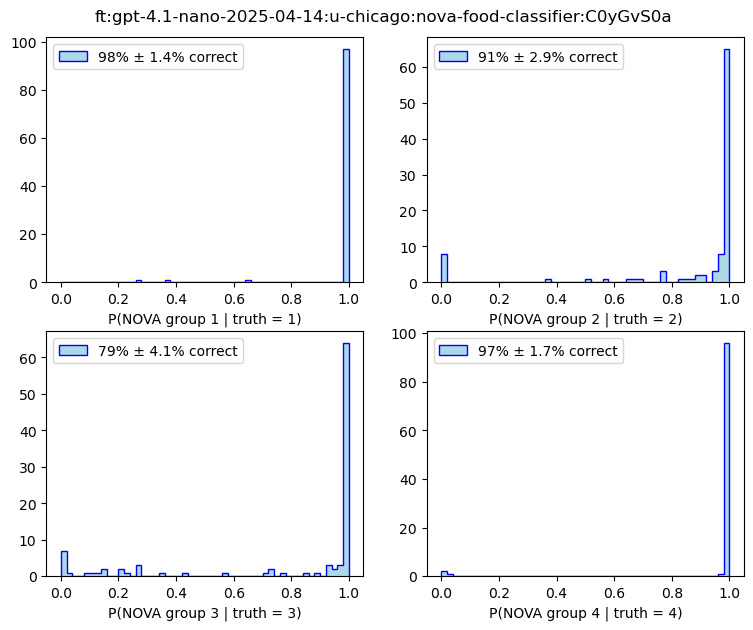

In [5]:
make_plots(results_finetune, "ft:gpt-4.1-nano-2025-04-14:u-chicago:nova-food-classifier:C0yGvS0a")

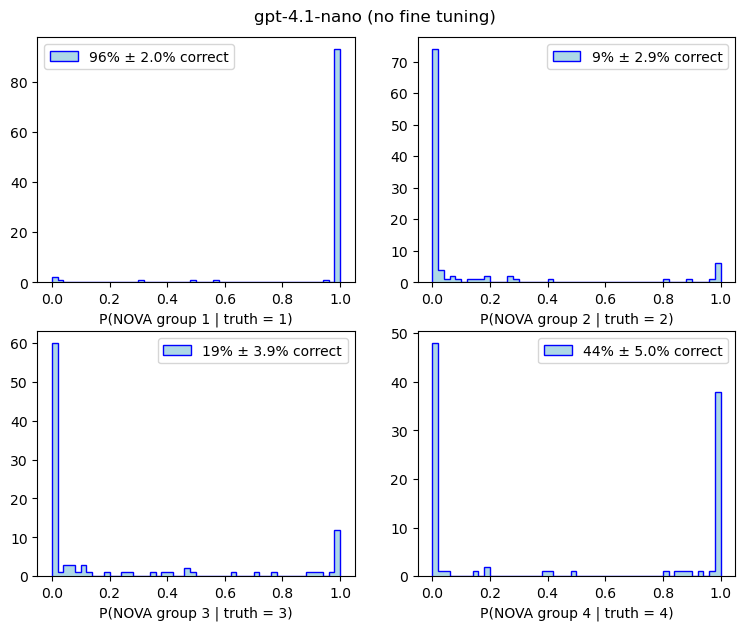

In [6]:
make_plots(results_default, "gpt-4.1-nano (no fine tuning)")